In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e3/sample_submission.csv
/kaggle/input/playground-series-s4e3/train.csv
/kaggle/input/playground-series-s4e3/test.csv


In [2]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')
sub_data= pd.read_csv('sample_submission.csv')

In [3]:
train_data.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1


In [4]:
test_data.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,19219,1015,1033,3826564,3826588,659,23,46,62357,67,...,0.0095,0.5652,1.0000,1.0,2.8410,1.1139,1.6628,0.6727,-0.2261,0.9172
1,19220,1257,1271,419960,419973,370,26,28,39293,92,...,0.0047,0.2414,1.0000,1.0,2.5682,0.9031,1.4472,0.9063,-0.1453,0.9104
2,19221,1358,1372,117715,117724,289,36,32,29386,101,...,0.0155,0.6000,0.7500,0.0,2.4609,1.3222,1.3222,-0.5238,-0.0435,0.6514
3,19222,158,168,232415,232440,80,10,11,8586,107,...,0.0037,0.8000,1.0000,1.0,1.9031,0.6990,1.0414,0.1818,-0.0738,0.2051
4,19223,559,592,544375,544389,140,19,15,15524,103,...,0.0158,0.8421,0.5333,0.0,2.1461,1.3222,1.1461,-0.5714,-0.0894,0.4170


In [5]:
sub_data.head()

,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,19219,0.5,0.5,0.5,0.5,0.5,0.5,0.5
1,19220,0.5,0.5,0.5,0.5,0.5,0.5,0.5
2,19221,0.5,0.5,0.5,0.5,0.5,0.5,0.5
3,19222,0.5,0.5,0.5,0.5,0.5,0.5,0.5
4,19223,0.5,0.5,0.5,0.5,0.5,0.5,0.5


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19219 entries, 0 to 19218
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     19219 non-null  int64  
 1   X_Minimum              19219 non-null  int64  
 2   X_Maximum              19219 non-null  int64  
 3   Y_Minimum              19219 non-null  int64  
 4   Y_Maximum              19219 non-null  int64  
 5   Pixels_Areas           19219 non-null  int64  
 6   X_Perimeter            19219 non-null  int64  
 7   Y_Perimeter            19219 non-null  int64  
 8   Sum_of_Luminosity      19219 non-null  int64  
 9   Minimum_of_Luminosity  19219 non-null  int64  
 10  Maximum_of_Luminosity  19219 non-null  int64  
 11  Length_of_Conveyer     19219 non-null  int64  
 12  TypeOfSteel_A300       19219 non-null  int64  
 13  TypeOfSteel_A400       19219 non-null  int64  
 14  Steel_Plate_Thickness  19219 non-null  int64  
 15  Ed

In [7]:
train_data.dropna(axis=0)

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,19214,749,757,143210,143219,17,4,4,2193,122,...,-0.1429,0.0044,0.2901,0,0,0,1,0,0,0
19215,19215,723,735,2488529,2488541,231,17,26,27135,104,...,0.7222,-0.0989,0.5378,0,0,0,0,0,0,1
19216,19216,6,31,1578055,1578129,780,114,98,71112,41,...,0.7719,-0.4283,0.9997,1,0,0,0,0,0,0
19217,19217,9,18,1713172,1713184,126,13,26,14808,88,...,0.9610,-0.1162,0.3509,0,0,0,0,0,0,1


<Axes: >

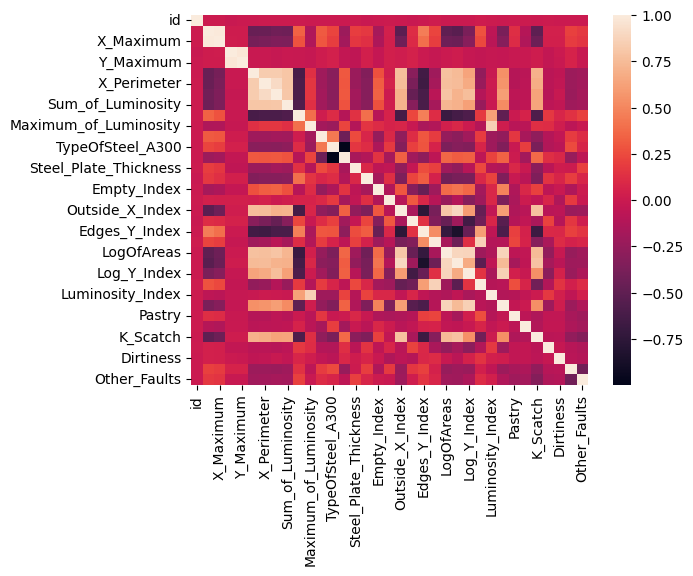

In [8]:
import seaborn as sns
sns.heatmap(train_data.select_dtypes("number").corr())

In [9]:
target = ["Pastry","Z_Scratch","K_Scatch","Stains","Dirtiness","Bumps","Other_Faults"]
X=train_data.drop(columns= target +['id'])


y= train_data[target]

print(X)

       X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0            584        590     909972     909977            16            8   
1            808        816     728350     728372           433           20   
2             39        192    2212076    2212144         11388          705   
3            781        789    3353146    3353173           210           16   
4           1540       1560     618457     618502           521           72   
...          ...        ...        ...        ...           ...          ...   
19214        749        757     143210     143219            17            4   
19215        723        735    2488529    2488541           231           17   
19216          6         31    1578055    1578129           780          114   
19217          9         18    1713172    1713184           126           13   
19218       1505       1525    1733458    1733471           182           24   

       Y_Perimeter  Sum_of_Luminosity  

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.multioutput import MultiOutputClassifier
import joblib
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier



In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize classifiers
rf_classifier = RandomForestClassifier()
lgbm_classifier = LGBMClassifier()
xgb_classifier = XGBClassifier()
catboost_classifier = CatBoostClassifier()
extratrees_classifier = ExtraTreesClassifier()

In [12]:
# Initialize multi-output classifiers
rf_multi_classifier = MultiOutputClassifier(rf_classifier, 
                                            n_jobs=-1)
lgbm_multi_classifier = MultiOutputClassifier(lgbm_classifier, 
                                              n_jobs=-1)
xgb_multi_classifier = MultiOutputClassifier(xgb_classifier, 
                                             n_jobs=-1)
catboost_multi_classifier = MultiOutputClassifier(catboost_classifier, 
                                                  n_jobs=-1)
extratrees_multi_classifier = MultiOutputClassifier(extratrees_classifier, 
                                                    n_jobs=-1);

In [13]:
rf_cv_scores = cross_val_score(rf_multi_classifier, X_train, y_train, 
                               cv=5, scoring='accuracy')
lgbm_cv_scores = cross_val_score(lgbm_multi_classifier, X_train, y_train, 
                                 cv=5, scoring='accuracy')
xgb_cv_scores = cross_val_score(xgb_multi_classifier, X_train, y_train, 
                                cv=5, scoring='accuracy')
catboost_cv_scores = cross_val_score(catboost_multi_classifier, X_train, y_train, 
                                     cv=5, scoring='accuracy')
extratrees_cv_scores = cross_val_score(extratrees_multi_classifier, X_train, y_train, 
                                       cv=5, scoring='accuracy')

[LightGBM] [Info] Number of positive: 942, number of negative: 11358
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012490 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5164
[LightGBM] [Info] Number of data points in the train set: 12300, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.076585 -> initscore=-2.489672
[LightGBM] [Info] Start training from score -2.489672
[LightGBM] [Info] Number of positive: 4146, number of negative: 8154
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027970 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5164
[LightGBM] [Info] Number of data points in the train set: 12300, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.337073 -> initscore=-0.676365
[Light

In [14]:
# Print mean cross-validation scores
print("Random Forest CV Accuracy:", rf_cv_scores.mean())
print("LightGBM CV Accuracy:", lgbm_cv_scores.mean())
print("XGBoost CV Accuracy:", xgb_cv_scores.mean())
print("CatBoost CV Accuracy:", catboost_cv_scores.mean())
print("ExtraTrees CV Accuracy:", extratrees_cv_scores.mean())

Random Forest CV Accuracy: 0.37801626016260165
LightGBM CV Accuracy: 0.4185365853658537
XGBoost CV Accuracy: 0.4171707317073171
CatBoost CV Accuracy: 0.41762601626016266
ExtraTrees CV Accuracy: 0.3740487804878049


In [15]:
lg_classifier = LogisticRegression()
lg_multi_classifier = MultiOutputClassifier(lg_classifier,n_jobs=-1)
lg_cv_scores= cross_val_score(lg_multi_classifier,X_train,y_train, cv=5,scoring='accuracy')
print("Logistic CV Accuracy:",lg_cv_scores.mean())

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic CV Accuracy: 0.19310569105691058


In [16]:
# Choose the best model
best_model = max([
    (rf_cv_scores.mean(), 'Random Forest'),
    (lgbm_cv_scores.mean(), 'LightGBM'),
    (xgb_cv_scores.mean(), 'XGBoost'),
    (catboost_cv_scores.mean(), 'CatBoost'),
    (extratrees_cv_scores.mean(), 'ExtraTrees'),
    (lg_cv_scores.mean(),'Logistic Regression')
])

print("Best Model:", best_model[1])

Best Model: LightGBM


In [17]:
# Train the best model on the entire training data
best_classifier = None
if best_model[1] == 'Random Forest':
    best_classifier = rf_multi_classifier.fit(X_train, y_train)
elif best_model[1] == 'LightGBM':
    best_classifier = lgbm_multi_classifier.fit(X_train, y_train)
elif best_model[1] == 'XGBoost':
    best_classifier = xgb_multi_classifier.fit(X_train, y_train)
elif best_model[1] == 'CatBoost':
    best_classifier = catboost_multi_classifier.fit(X_train, y_train)
elif best_model[1] == 'ExtraTrees':
    best_classifier = extratrees_multi_classifier.fit(X_train, y_train)
elif best_model[1] == 'Logistic Regression':
    best_classifier = lg_multi_classifier.fit(X_train, y_train)    
        

In [18]:
# Save the best model
model = joblib.dump(best_classifier, 'best_model.joblib')

In [19]:
test_ids = test_data['id']
test_features = test_data.drop('id', axis=1)

In [20]:
best_test_probs = best_classifier.predict_proba(test_features)

In [21]:
best_test_probs

[array([[5.39189979e-01, 4.60810021e-01],
        [5.97094861e-01, 4.02905139e-01],
        [9.99316524e-01, 6.83475503e-04],
        ...,
        [9.99846738e-01, 1.53262116e-04],
        [7.57610467e-01, 2.42389533e-01],
        [9.99484937e-01, 5.15063359e-04]]),
 array([[9.99609842e-01, 3.90158267e-04],
        [9.91416112e-01, 8.58388760e-03],
        [9.49945247e-01, 5.00547532e-02],
        ...,
        [9.99704654e-01, 2.95346434e-04],
        [9.91961076e-01, 8.03892443e-03],
        [9.99273159e-01, 7.26840787e-04]]),
 array([[0.99870298, 0.00129702],
        [0.99544547, 0.00455453],
        [0.97640407, 0.02359593],
        ...,
        [0.05835452, 0.94164548],
        [0.98880829, 0.01119171],
        [0.06515065, 0.93484935]]),
 array([[9.99995551e-01, 4.44873862e-06],
        [9.99992284e-01, 7.71582545e-06],
        [9.99979891e-01, 2.01093497e-05],
        ...,
        [9.99990956e-01, 9.04380039e-06],
        [9.99991016e-01, 8.98356856e-06],
        [9.99988262e-01,

In [22]:
# Generate submission file
submission_df = pd.DataFrame({'id': test_ids})
# Iterate over each target
for i, target in enumerate(y_train.columns):
    # Fetch the probability of the positive class for each target
    # Store the positive probabilities in the respective target column
    submission_df[target] = best_test_probs[i][:, 1]  # Probability of positive class

submission_df.to_csv('submission.csv', index=False)
print("done")

done


In [23]:
import time
# Generate submission file
submission_df = pd.DataFrame({'id': test_ids})
# Iterate over each target
for i, target in enumerate(y_train.columns):
    # Fetch the probability of the positive class for each target
    # Store the positive probabilities in the respective target column
    submission_df[target] = best_test_probs[i][:, 1]  # Probability of positive class
    time.sleep(6)
    print(submission_df) 
submission_df.to_csv('submission.csv', index=False)

          id    Pastry
0      19219  0.460810
1      19220  0.402905
2      19221  0.000683
3      19222  0.287312
4      19223  0.000962
...      ...       ...
12809  32028  0.054843
12810  32029  0.268824
12811  32030  0.000153
12812  32031  0.242390
12813  32032  0.000515

[12814 rows x 2 columns]
          id    Pastry  Z_Scratch
0      19219  0.460810   0.000390
1      19220  0.402905   0.008584
2      19221  0.000683   0.050055
3      19222  0.287312   0.000240
4      19223  0.000962   0.000284
...      ...       ...        ...
12809  32028  0.054843   0.046365
12810  32029  0.268824   0.000839
12811  32030  0.000153   0.000295
12812  32031  0.242390   0.008039
12813  32032  0.000515   0.000727

[12814 rows x 3 columns]
          id    Pastry  Z_Scratch  K_Scatch
0      19219  0.460810   0.000390  0.001297
1      19220  0.402905   0.008584  0.004555
2      19221  0.000683   0.050055  0.023596
3      19222  0.287312   0.000240  0.000128
4      19223  0.000962   0.000284  0.000165
